<div class="alert alert-block alert-success">
<h1>Hex-agony</h1>
<h4>OCTOBER 2015: PUZZLE</h4>
</div>

# Hex-agony
The grid below is incomplete: add non-negative integers to some (perhaps not all) of the hexes so that the following conditions are satisfied:
1. Each <span style="color: red;">red</span> nember equals to the **sum of the <span style="color: blue;">blue</span> numbers** in its view.
2. Each <span style="color: blue;">blue</span> number equals to the **maximum of the <span style="color: green;">green</span> numbers** in its view.
    (Or 0, if no <span style="color: green;">green</span> numbers are viewable)
3. Each <span style="color: green;">green</span> number equals to the **product of the black numbers** in its view.
    (Or 1, if no **black** numbers are viewable)
4. Each **black** equals to **the number of red numbers** in its view.

(* A number is viewable from a hex if it is in the same column or diagonal as that hex.)

**To enter, submit the largest possible sum for the numbers in the middle column.**

<img src="photo/problem.png" width=720 height=20 />

The puzzle was publised at https://www.janestreet.com/puzzles/hex-agony-index/

<div class="alert alert-block alert-warning">
    <h1>Break down the problem</h1>
</div>

This puzzle challenges you to fill in a grid of hexagons with numbers according to a set of rules. Each hexangon has a unique color and specific rules associated with them. The objective is to strategically place non-negative integers in certain hexagons so that all the given requirements are met. Let's break down the rules:

**Requirements**

1. <span style="color: red;">Red</span> Numbers: Each red number should be equal to the **sum of the <span style="color: blue;">blue</span> numbers** in its view. Red numbers can "see" blue numbers if they are in the same column or diagonal as the red number.
2. <span style="color: blue;">Blue</span> Numbers: Each blue number should be equal to the **maximum of the <span style="color: green;">green</span> numbers** in its view, or 0 if no green numbers are visible. Blue numbers can "see" green numbers that are in the same column or diagonal as the blue number.
3. <span style="color: green;">Green</span> Numbers: Each green number should be equal to the **product of the black numbers** in its view, or 1 if no black numbers are visible. Green numbers can "see" black numbers that are in the same column or diagonal as the green number.
4. **Black** Numbers: Each black number should be equal to **the number of red numbers** in its view. Black numbers can "see" red numbers that are in the same column or diagonal as the black number.

**Submission**

Your task is to fill in the grid such that all of these conditions are satisfied. The puzzle is asking for the largest possible sum of the numbers in the middle column once you've completed the grid.

<div class="alert alert-info">
  <h1>Solution</h1>
</div>

## Import necessary modules and libraries

In [32]:
import numpy as np
import time
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from IPython.display import Markdown
from z3 import *

### Prime Factors

Prime factors are the prime numbers that multiply together to give a particular number.
For example, let's find the prime factors of 60:
$$60÷2 =30$$
$$30÷2 =15$$
$$15÷3 =5$$
$$5÷5  =1$$
So, the prime factorization of 60 is $2^2 x 3 x 5$, and the prime factors are **2, 3, and 5**.

### Finding prime factors in Python using SymPy

In [33]:
from sympy.ntheory import primefactors
number = 60
factors = primefactors(number)

print(f"The prime factors of {number} are: {factors}")

The prime factors of 60 are: [2, 3, 5]


## Form Coordinates for the grid

<img src="photo/explanation-1.png" width=720 height=30 />

**Comment**:
All values in a position will have a sum of 0. For example, (0, 4, -4): 0 + 4 + (-4) = 0

## Create hexagony

In [100]:
def hex_print(coord,colors,labels):    
    # Horizontal cartesian coords
    hcoord = [c[0] for c in coord]

    # Vertical cartersian coords
    vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]
    
    # 7-green: (-1, 4, -3)
    # 0-red: (-2, 4, -2)
    # 3997-red: (4, 0, -4)
    # 3059-blue: (1, 2, -3)
    # 854-red: (4, -2, -2)
    # 121121-blue: (2, -1, -1)
    # 847-green: (-4, 2, 2)
    # 0-red: (-3, 0, 3)
    # 7-red: (-2, -2, 4)
    # 11-black: (1, -3, 2)
    # 7-red: (3, -4, 1)
    
    givens = [[-1, 4, -3], 
              [-2, 4, -2], 
              [4, 0, -4], 
              [1, 2, -3], 
              [4, -2, -2], 
              [2, -1, -1], 
              [-4, 2, 2], 
              [-3, 0, 3], 
              [-2, -2, 4], 
              [1, -3, 2], 
              [3, -4, 1]]
    
    border = [1 if list(x) in givens else 0 for x in coord]
    fig, ax = plt.subplots(1,figsize=(10,10))
    ax.set_aspect('equal')
   
    # Add some coloured hexagons
    for x, y, c, l, b in zip(hcoord, vcoord, colors, labels, border):
        color = c[0].lower()  # matplotlib understands lower case words for colours
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., facecolor=color,
                         orientation=np.radians(30), alpha=0.2, edgecolor="grey")
        
        ax.add_patch(hex)
        # Also add a text label
        ax.text(x, y+0.2, l, ha='center', va='center', size=10)
        if b == 1:
            hex2 = RegularPolygon((x, y), numVertices=6, radius=2. / 3.,
                         orientation=np.radians(30), alpha=1,fill= False, edgecolor="k")        
            ax.add_patch(hex2)
        
    # Also add scatter points in hexagon centres
    ax.scatter(hcoord, vcoord, c=[c[0].lower() for c in colors], alpha=0)
    plt.axis("off")
    plt.show()

Since each <span style="color: blue;">blue</span> number equals to the maximum of the <span style="color: green;">green</span> numbers while the <span style="color: green;">green</span> numbers equal the product of the black numbers, we should find the **prime factors** of both <span style="color: blue;">blue</span> and <span style="color: blue;">green</span> numbers in the Hexagony.

In [35]:
print(primefactors(121121)) # Blue number
print(7*11*11*11*13)
print(primefactors(3059)) # Blue number
print(7*19*23)
print(primefactors(847)) # Green number
print(7*11*11)
print(primefactors(7)) # Green number
print(7)

[7, 11, 13]
121121
[7, 19, 23]
3059
[7, 11]
847
[7]
7


## Inferred values
This is the final inferred values after we discussed on [this article](https://medium.com/@quachmaiboi/self-study-plan-for-quant-researcher-puzzle-day-6-4c622797f00a)

<img src="photo/explanation-17.png" width=650 height=30 />

## Create points and corresponding colors

In [212]:
point = {}
point_colour = {}
cols = ["k","b","r","g","w"] #k: grey -> black numbers, b: blue -> blue numbers, r: red -> red numbers, g: green -> green numbers, w: white -> None
# 0: Black, 1: Blue, 2: Red, 3: Green, 4: White
lab_col= [2,2,3,2,2, # Column 1: (bottom -> top, left) red, red, green, red, red
          0,2,2,2,2,4, # Column 2: black, red, red, red, red, white
          2,2,2,0,3,2,2, # Column 3: red, red, red, black, green, red, red
          3,3,3,2,2,0,3,3, # Column 4: green, green, green, red, red, black, green, green
          2,2,2,2,0,2,2,2,2, # Column 5: red, red, red, red, black, red, red, red, red
          2,0,2,2,2,2,1,1, # Column 6: red, black, red, red, red, red, blue, blue
          0,2,2,1,2,2,1, # Column 7: black, red, red, blue, red, red, blue
          2,2,1,0,2,2, # Column 8: red, red, blue, black, red, red
          2,1,2,2,2 # Column 9: red, blue, red, red, red
         ] 

## Set up solver

In [213]:
s = Optimize()

## Set up the coordinates and colors for hexes

In [214]:
x=0

#Set up the variables
for i,j,k in itertools.product(range(-4,5),range(-4,5),range(-4,5)):
    if i+j+k !=0:
        continue
    point[(i,j,k)] = Int("x_%s_%s_%s" % (i + 5, j + 5, k + 5))
    point_colour[(i,j,k)] = Int("c_%s_%s_%s" % (i + 5, j + 5, k + 5))
    x += 1
s.maximize(Sum([point[(x,y,z)] for x,y,z in point.keys() if x == 0]))

## Set up values for hexes

In [215]:
s += [point[(i,j,k)] > -1 for (i,j,k) in point.keys()]
s += [And(point_colour[(i,j,k)] >=0,point_colour[(i,j,k)] <5)  for (i,j,k) in point_colour.keys()]

<div class="alert alert-info">
  <h3>3059-Blue</h3>
</div>

In [216]:
# A 23-black tile in the centre.
s += point[(0,0,0)] == 23
s += point_colour[(0,0,0)] == 0

In [217]:
# The other 19-black is here
s += point[(-2,1,1)] == 19
s += point_colour[(-2,1,1)] == 0

In [218]:
# As a result, the 3059-green is here
s += point[(-2,2,0)] == 3059
s += point_colour[(-2,2,0)] == 3

<div class="alert alert-block alert-success">
<h3>7-Green</h3>
</div>

In [219]:
# Implies that a 7-black here
s += point[(-1,2,-1)] == 7
s += point_colour[(-1,2,-1)] == 0

<div class="alert alert-info">
  <h3>121121-Blue</h3>
</div>

In [220]:
# Implies that a 121121-green here
s += point[(-1,-1, 2)] == 121121
s += point_colour[(-1,-1, 2)] == 3

In [221]:
# Put the 13-black and 2 11s-black in the 121121-blue's views
# 13-black
s += point[(3, -1, -2)] == 13
s += point_colour[(3, -1, -2)] == 0
# 11-black
s += point[(-3, -1, 4)] == 11
s += point_colour[(-3, -1, 4)] == 0
# 11-black
s += point[(2, -4, 2)] == 11
s += point_colour[(2, -4, 2)] == 0

</div>
<div class="alert alert-danger" role="alert">
<h3>7-Red</h3>
</div>

In [222]:
# Forces a 7-blue here
s += point[(3, -2, -1)] == 7
s += point_colour[(3, -2, -1)] == 1

</div>
<div class="alert alert-danger" role="alert">
<h3>854-Red</h3>
</div>

In [223]:
# Forces a 847-blue here
s += point[(4, -3, -1)] == 847
s += point_colour[(4, -3, -1)] == 1

<div class="alert alert-info">
  <h3>7-Blue</h3>
</div>

In [224]:
# Implies a 7-green here
s += point[(-1, -2, 3)] == 7
s += point_colour[(-1, -2, 3)] == 3

<div class="alert alert-info">
  <h3>847-Blue</h3>
</div>

In [225]:
# Implies a 847-green here
s += point[(-1, -3, 4)] == 847
s += point_colour[(-1, -3, 4)] == 3

</div>
<div class="alert alert-danger" role="alert">
<h3>3997-Red</h3>
</div>

In [226]:
# Put a 3059-blue in its view
s += point[(2, 2, -4)] == 3059
s += point_colour[(2, 2, -4)] == 1

In [227]:
# Put a 91-blue in its view
s += point[(1, 3, -4)] == 91
s += point_colour[(1, 3, -4)] == 1

<div class="alert alert-info">
  <h3>91-Blue</h3>
</div>

In [228]:
# Force a 91-green here
s += point[(-1, 3, -2)] == 91
s += point_colour[(-1, 3, -2)] == 3

### An empty title

In [229]:
s += point[(-3, 4, -1)] == 0
s += point_colour[(-3, 4, -1)] == 4

### Black cells

In [230]:
# limit blacks to the factors of the blue/green cells
for i,j,k in point.keys():  
    s+= Implies(point_colour[(i,j,k)] == 0,Or([point[(i,j,k)] == n for n in [7,11,13,19,23]])) 

## Fixed points

In [231]:
# Fixed points    
# 7-green: (-1, 4, -3)
s += point[(-1,4,-3)] == 7
s += point_colour[(-1,4,-3)] == 3

# 0-red: (-2, 4, -2)
s += point[(-2,4,-2)] == 0
s += point_colour[(-2,4,-2)] == 2

# 3997-red: (4, 0, -4)
s += point[(4,0,-4)] == 3997
s += point_colour[(4,0,-4)] == 2

# 3059-blue: (1, 2, -3)
s += point[(1,2,-3)] == 3059
s += point_colour[(1,2,-3)] == 1

# 854-red: (4, -2, -2)
s += point[(4,-2,-2)] == 854
s += point_colour[(4,-2,-2)] == 2

# 121121-blue: (2, -1, -1)
s += point[(2,-1,-1)] == 121121
s += point_colour[(2,-1,-1)] == 1

# 847-green: (-4, 2, 2)
s += point[(-4,2,2)] == 847
s += point_colour[(-4,2,2)] == 3

# 0-red: (-3, 0, 3)
s += point[(-3,0,3)] == 0
s += point_colour[(-3,0,3)] == 2

# 7-red: (-2, -2, 4)
s += point[(-2,-2,4)] == 7
s += point_colour[(-2,-2,4)] == 2

# 11-black: (1, -3, 2)
s += point[(1,-3,2)] == 11
s += point_colour[(1,-3,2)] == 0

# 7-red: (3, -4, 1)
s += point[(3,-4,1)] == 7
s += point_colour[(3,-4,1)] == 2 


### Put the constraints

In [232]:
# constraints
for i,j,k in point.keys(): 
    s+= Implies(point_colour[(i,j,k)] == 0,  # black numbers = number of red numbers
               point[(i,j,k)] == Sum(                 
                   [If(point_colour[(x,y,z)] == 2,1,0) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])) 
  
    
    s+=  Implies(point_colour[(i,j,k)] == 1,  # blue number = max of green numbers 
        Or(point[(i,j,k)] ==0, *[And(point[(i,j,k)] == point[(x,y,z)],point_colour[(x,y,z)] == 3) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z))]))
    
    s+=  [Implies(And(point_colour[(x,y,z)] == 3, point_colour[(i,j,k)] ==1) ,point[(i,j,k)] >= point[(x,y,z)]) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z))]

    
    s+= Implies(point_colour[(i,j,k)] == 2, # red numbers = sum of blue numbers 
               point[(i,j,k)] == Sum(                 
                   [If(point_colour[(x,y,z)] == 1,point[(x,y,z)],0) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])
               )
    
    s+= Implies(point_colour[(i,j,k)] == 3, #green numbers = product of black numbers
               point[(i,j,k)] == Product(                 
                   [If(point_colour[(x,y,z)] == 0,point[(x,y,z)],1) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])
               )

## Solve and print the result

Solved in 40.4596 seconds
Sum is: 256,391


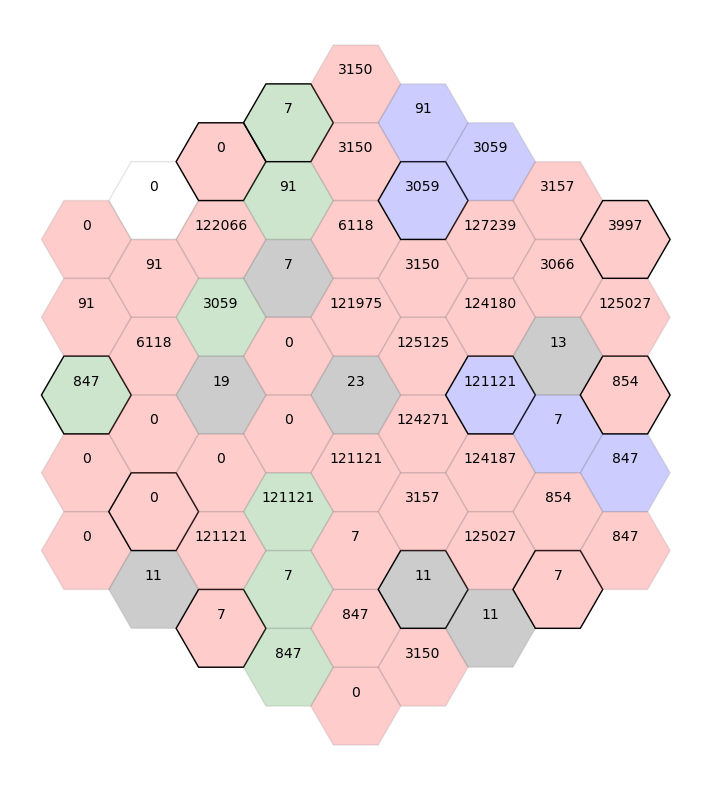

In [234]:
start = time.time()
if s.check() == sat:
    m = s.model()
    coord= [x for x in point.keys()]    
    color = [cols[m.evaluate(point_colour[x]).as_long()] for x in point_colour.keys()]
    labels = [m.evaluate(point[x]).as_long() for x in point.keys()] 
    answer = np.sum([m.evaluate(point[(i,j,k)]).as_long() for (i,j,k) in point.keys() if i==0])
    stop = time.time()
    print("Solved in {:.4f} seconds".format(stop-start))
    print("Sum is: {:,.0f}".format(answer))
    hex_print(coord,color,labels)

else:
    print("Failed")

<div class="alert alert-info">
  <h1>Public Solution</h1>
</div>

<img src="https://www.janestreet.com/puzzles/hexagony_ans.png" width=720 height=50 />

The BEST SOLUTION was publised at https://www.janestreet.com/puzzles/hex-agony-solution/